# PROBLEM DEFINITION: 
Run a RF model on train data of Unit I and compute the mean error in the
test set. Check how your result compare with Assignment-1

# Theory:
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification andRegression 
problems. It builds decision trees on different samples and takes their majority vote for classification and average in
case of regression.

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing
continuous variables as in the case of regression and categorical variables as in the case of classification. It performs
better results for classification problems.

Random Forest grows multiple decision trees which are merged together for a more accurate prediction.
The logic behind the Random Forest model is that multiple uncorrelated models (the individual decision trees)
perform much better as a group than they do alone. When using Random Forest for classification, each tree gives a 
classification or a “vote.” The forest chooses the classification with the majority of the “votes.” When using 
Random Forest for regression, the forest picks the average of the outputs of all trees.

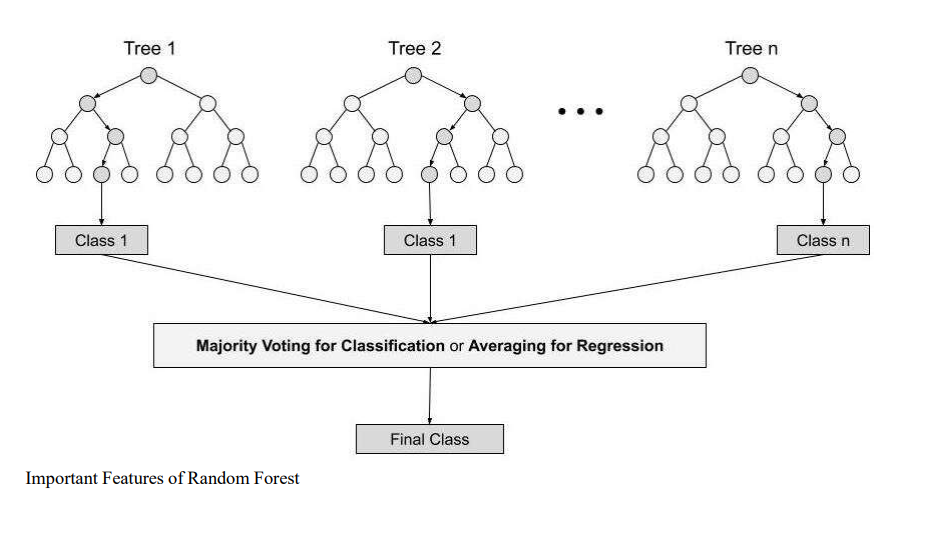

1. Diversity- Not all attributes/variables/features are considered while making an individual
tree, each tree is different.

2. Immune to the curse of dimensionality- Since each tree does not consider all the features, the
feature space is reduced.

3. Parallelization-Each tree is created independently out of different data and attributes. This means
that we can make full use of the CPU to build random forests.

4. Train-Test split- In a random forest we don’t have to segregate the data for train and test as
there will always be 30% of the data which is not seen by the decision tree.

5. Stability- Stability arises because the result is based on majority voting/ averaging

# Steps involved in random forest algorithm:
Step 1: In Random forest n number of random records are taken from the data set having k number of
records.

Step 2: Individual decision trees are constructed for each
sample.

Step 3: Each decision tree will generate an output.

Step 4: Final output is considered based on Majority Voting or Averaging for Classification and
regression respectively.



Import necessary liabraries

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
df = pd.read_csv("iris.csv")

In [19]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
df.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

In [21]:
df.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [22]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [23]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

In [24]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Pairplot for pairwise relationships and class distributions

c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


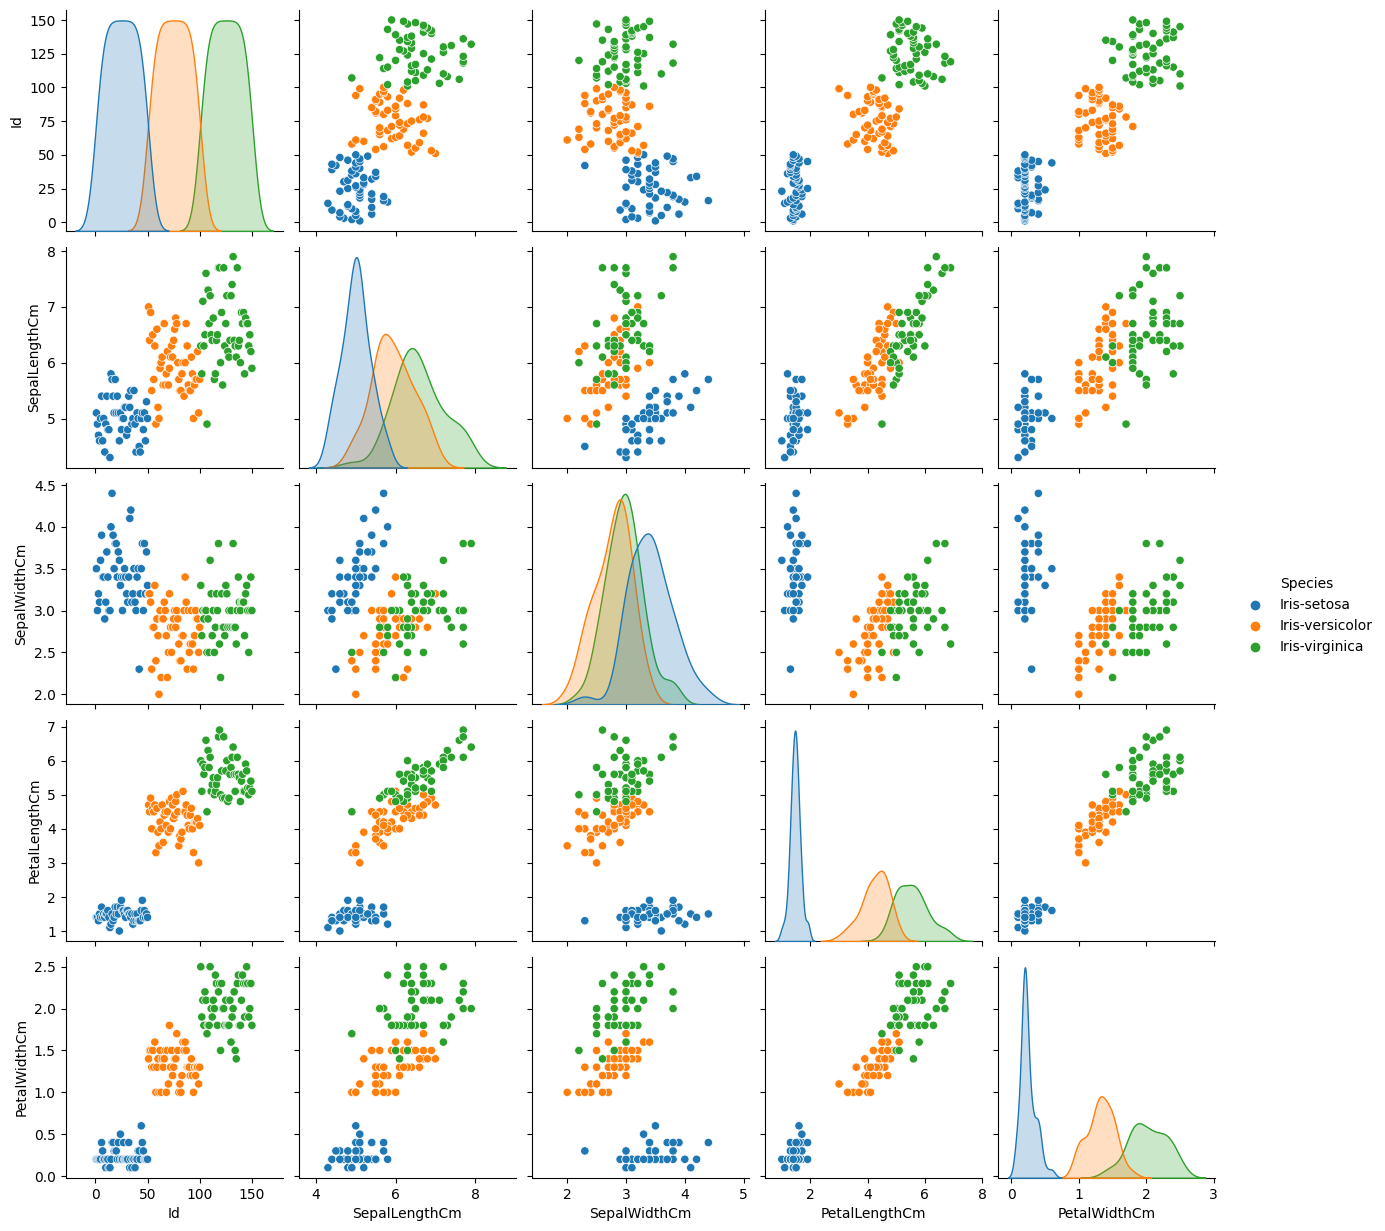

In [25]:
sns.pairplot(df, hue='Species')
plt.show()

Box plots for each feature by species

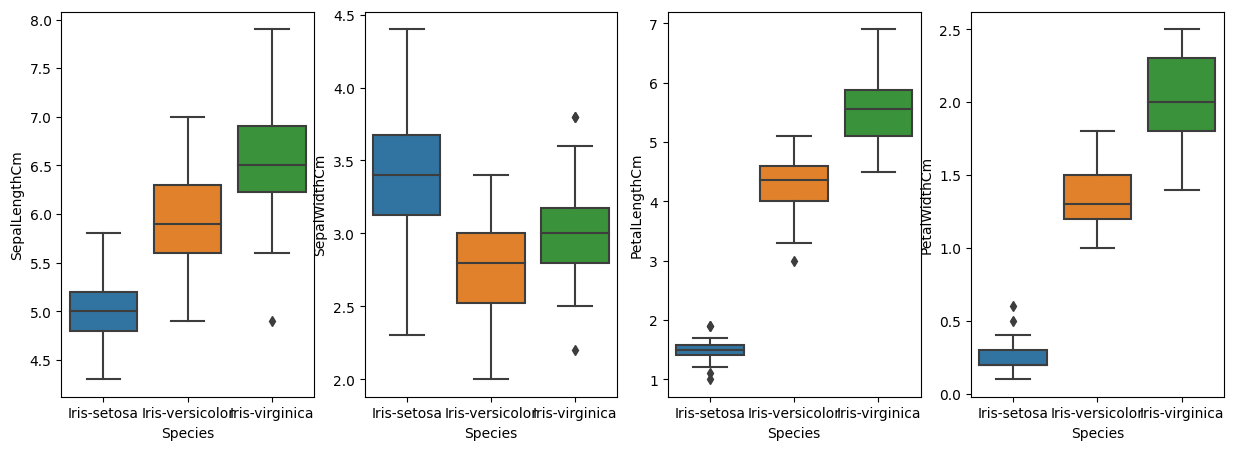

In [26]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, feature in enumerate(df.columns[1:-1]):
    sns.boxplot(x='Species', y=feature, data=df, ax=axes[i])
plt.show()

Violin plots for a more detailed view of feature distributions by species

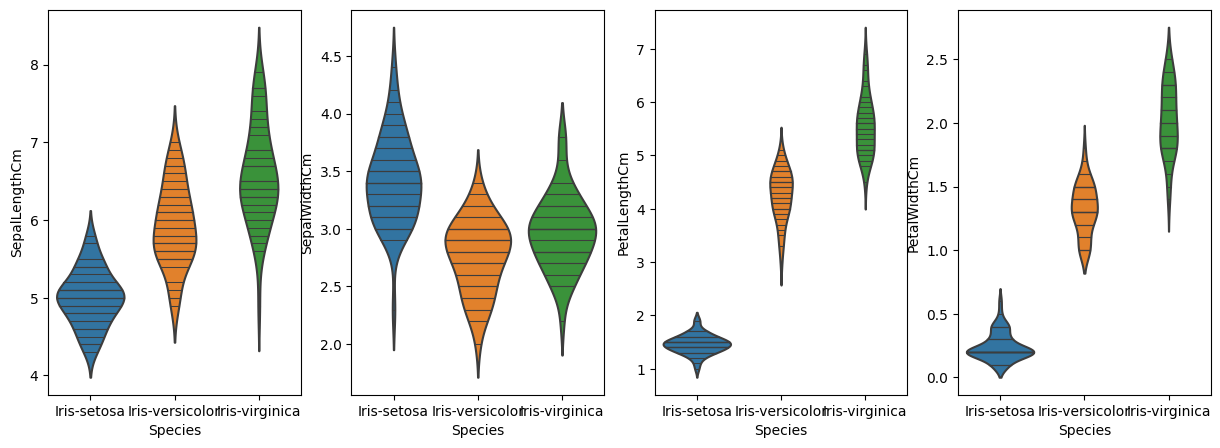

In [27]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, feature in enumerate(df.columns[1:-1]):
    sns.violinplot(x='Species', y=feature, data=df, ax=axes[i], inner='stick')
plt.show()

Correlation heatmap

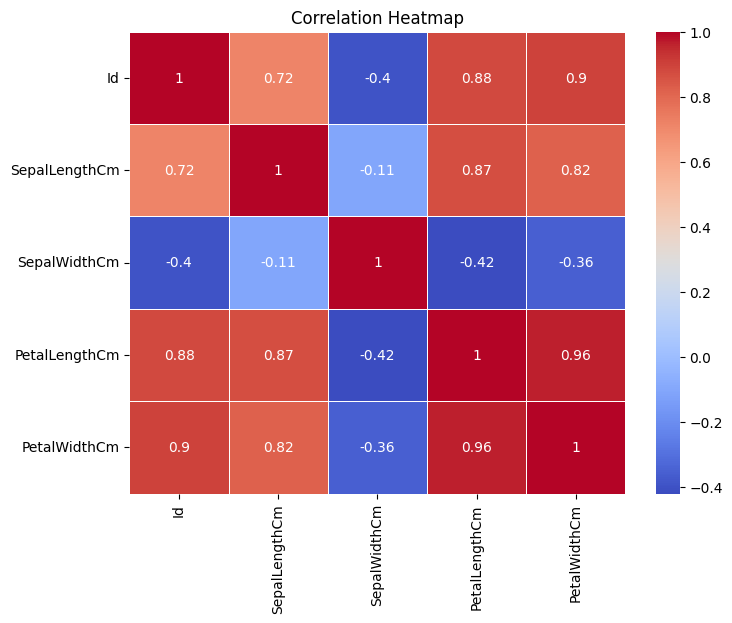

In [29]:
numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Split the data into features and the target variable

In [30]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

Split the data into a training set and a testing set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create and train the Random Forest classifier

In [32]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Make predictions on the test set

In [33]:
y_pred = clf.predict(X_test)

Evaluate the model

In [35]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

print(f"Accuracy on Test Data: {accuracy_percentage:.2f}%")

Accuracy on Test Data: 100.00%


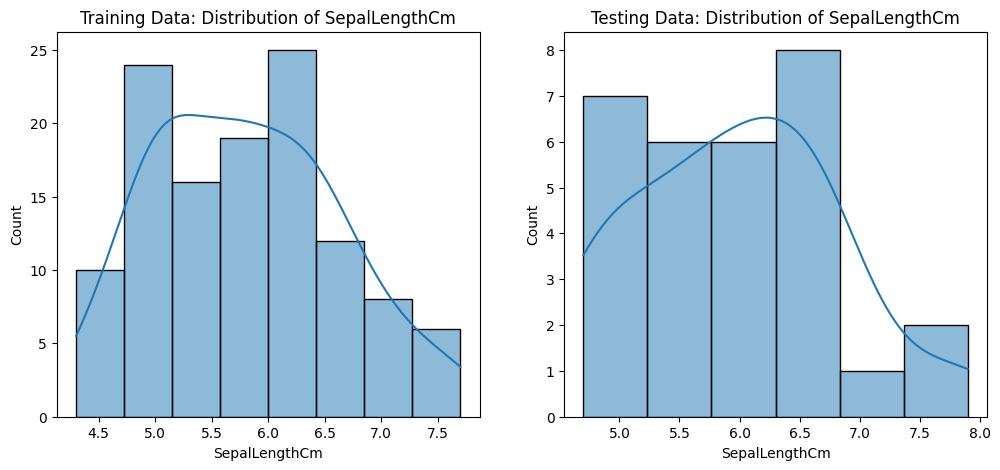

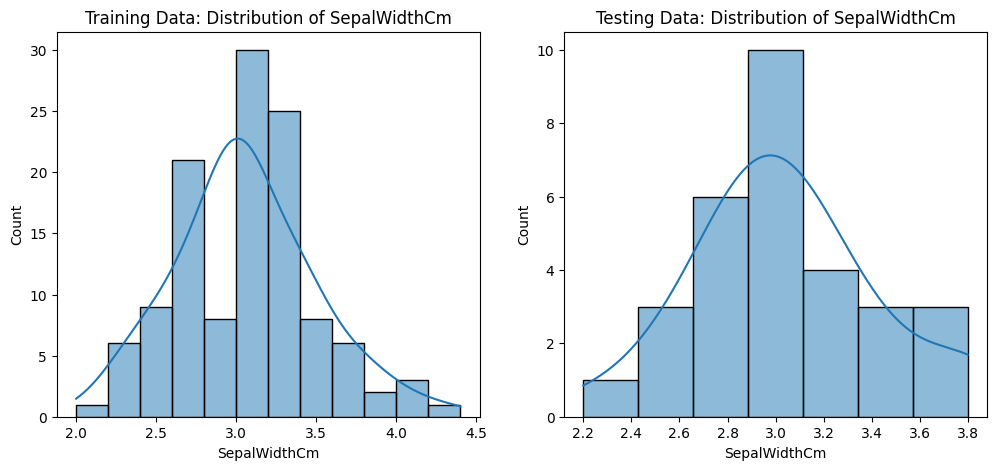

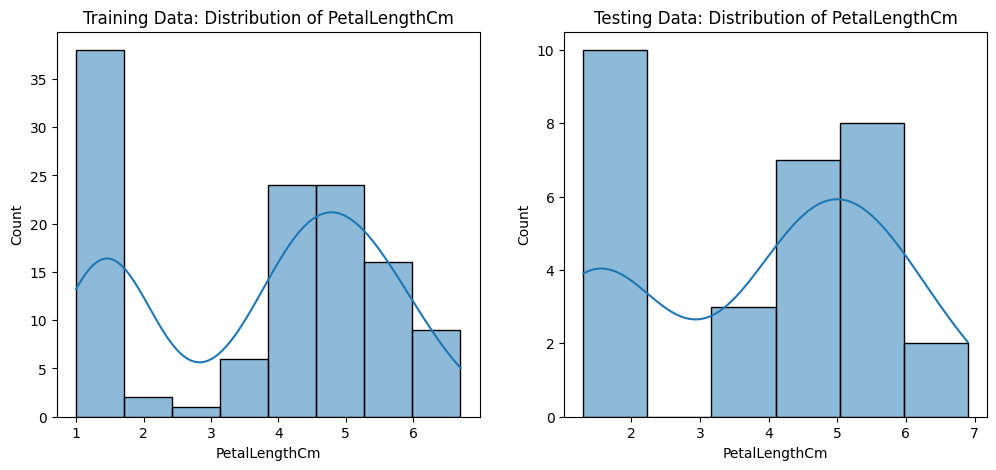

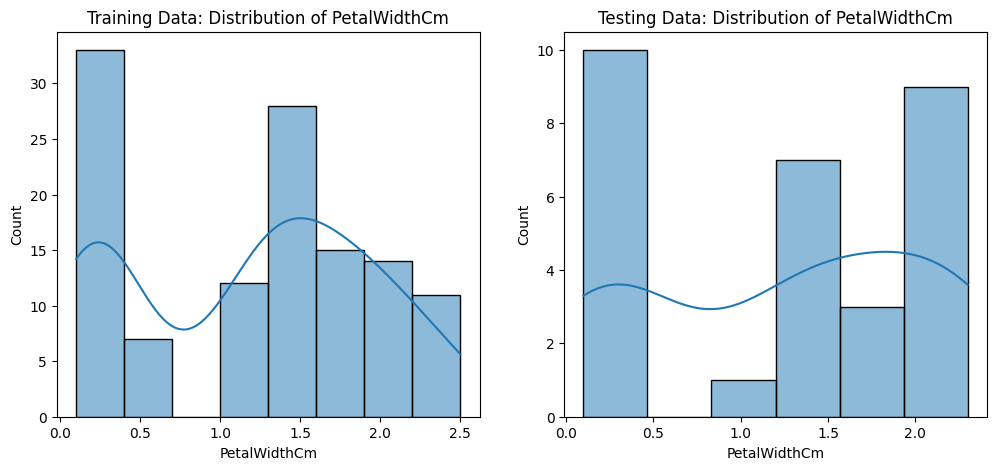

In [36]:
for feature in df.columns[1:-1]:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=X_train, x=feature, kde=True)
    plt.title(f'Training Data: Distribution of {feature}')

    plt.subplot(1, 2, 2)
    sns.histplot(data=X_test, x=feature, kde=True)
    plt.title(f'Testing Data: Distribution of {feature}')

    plt.show()